# Gradient Descent

**Disclaimer: For animating the path, restart the kernel and run only the relevant cells under that particular problem along with the imports (first cell).**

In [5]:
# The following imports are assumed for the rest of the problems
import numpy as np
from numpy import cos, sin, pi, exp 
# Set up the imports
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

Finding minimum using gradient descent:
$$\theta_j \leftarrow \theta_j - \alpha \frac{\partial }{\partial \theta_j} J(\theta)$$

To find the minimum, we update $\theta_j$ at each iteration by multipying the partial derivative (slope) of the cost function $J$ and the learning rate $\alpha$.

We repeat until $\theta_j$ coverges. Of course here, we will run only upto a tolerance. 

Hence, we arrive at the minima.

## Problem 1 - 1-D simple polynomial

The gradient is not specified.  You can write the function for gradient on your own.  The range within which to search for minimum is [-5, 5].

In [2]:
def f1(x):
    return x ** 2 + 3 * x + 8

Gradient function:

In [3]:
def df1_dx(x):
    return 2*x + 3

Finding minimum using gradient descent:

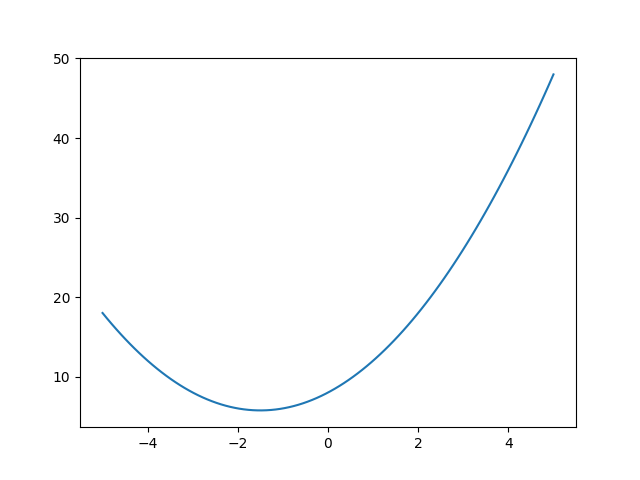

Minimum value of function = 5.751722679482537 at x = -1.4584948258341535


In [4]:
xbase = np.linspace(-5, 5, 100)
ybase = f1(xbase)
bestx = 3
rangemin, rangemax = -5, 5 
fig, ax = plt.subplots()
ax.plot(xbase, ybase)

xall, yall = [], []
lr = 0.1

while True:
    # Performing gradient descent
    x = bestx - df1_dx(bestx) * lr 
    ls = np.array([x])
    bestls = np.array([bestx])
    dist = np.linalg.norm(bestls - ls)

    # Break if less then tolerance
    if dist < 0.1*lr:
        break
    
    # Update bestx
    bestx = x
    y = f1(x)
    xall.append(bestx)
    yall.append(y)

# Plotting 
def onestepderiv(frame):
    ax.scatter(xall[:frame], yall[:frame], c='k')

# Animation
ani= FuncAnimation(fig, onestepderiv, frames=range(100), interval=100, repeat=False)
plt.show()

print(f"Minimum value of function = {f1(bestx)} at x = {bestx}")


## Problem 2 - 2-D polynomial

Functions for derivatives, as well as the range of values within which to search for the minimum, are given.

In [6]:
xlim3 =  [-10, 10]
ylim3 =  [-10, 10]
def f3(x, y):
    return x**4 - 16*x**3 + 96*x**2 - 256*x + y**2 - 4*y + 262

def f3_dx(x, y):
    return 4*x**3 - 48*x**2 + 192*x - 256

def f3_dy(x, y):
    return 2*y - 4

Finding minimum of $f_3$($x, y$) using gradient descent: 

Minimum value of function = 2.0003392927575874 at (3.8642800642759467, 1.999997445898247)


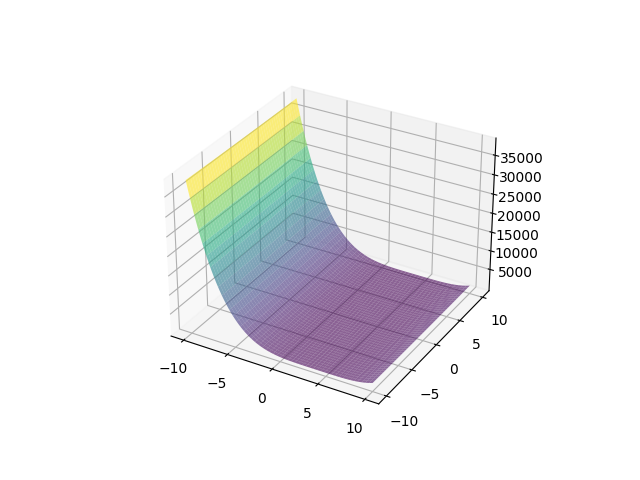

In [7]:
# Starting coordinates
bestx = -10
besty = 0

# Defining axes
xbase = np.linspace(-10, 10, 1000)
ybase = np.linspace(-10, 10, 1000)

# Using a meshgrid for 3D plotting
fig = plt.figure()
ax = plt.axes(projection='3d')
X, Y = np.meshgrid(xbase, ybase)
Z = []
for i in range(0,1000):
    for j in range(0,1000):
        Z.append(f3(X[i][j], Y[i][j]))
        
Z = np.array(Z).reshape(1000,1000)
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)

global xall, yall, zall
xall, yall, zall = [], [], []

lr = 0.0001

while True:
    # Performing gradient descent
    x = bestx - f3_dx(bestx,besty) * lr
    y = besty - f3_dy(bestx,besty) * lr 
    dist = ((x-bestx)**2 + (y - besty)**2)**0.5

    # break if less than tolerance
    if dist <0.01*lr:
        break

    # Update coordinates
    bestx = x
    besty = y
    z = f3(x,y)
    xall.append(x)
    yall.append(y)
    zall.append(z)

# Plotting 
def onestepderiv(frame):
    ax.scatter(xall[:frame], yall[:frame], zall[:frame])

print(f"Minimum value of function = {f3(bestx, besty)} at ({bestx}, {besty})")

# Animation
ani= FuncAnimation(fig, onestepderiv, frames=range(len(xall)), interval=100, repeat=False)
plt.show()

## Problem 3 - 2-D function 

Derivatives and limits given. 

In [2]:
xlim4 = [-pi, pi]
def f4(x,y):
    return exp(-(x - y)**2)*sin(y)

def f4_dx(x, y):
    return -2*exp(-(x - y)**2)*sin(y)*(x - y)

def f4_dy(x, y):
    return exp(-(x - y)**2)*cos(y) + 2*exp(-(x - y)**2)*sin(y)*(x - y)

Finding minimum of $f_4$($x, y$) using gradient descent: 

Minimum value of function = -0.9998888347122056 at (-1.5530466831416894, -1.5569380928860523)


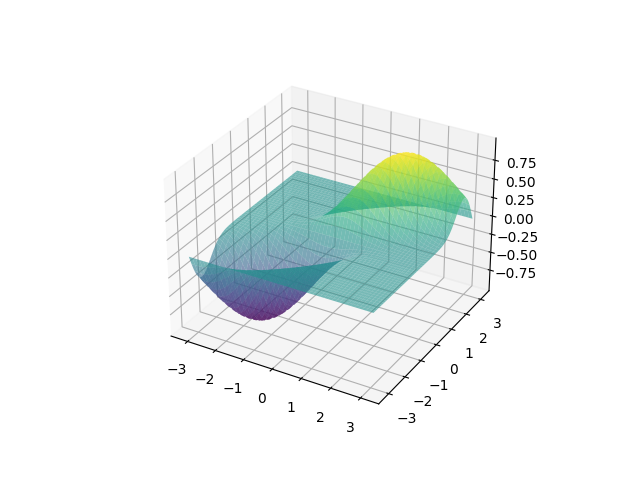

In [3]:
# Starting coordinates
bestx = 1
besty = 1

# Defining axes
xbase = np.linspace(-pi, pi, 1000)
ybase = np.linspace(-pi, pi, 1000)

# Using a meshgrid for 3D plotting
fig = plt.figure()
ax = plt.axes(projection='3d')
X, Y = np.meshgrid(xbase, ybase)
Z = []
for i in range(0,1000):
    for j in range(0,1000):
        Z.append(f4(X[i][j], Y[i][j]))
        
Z = np.array(Z).reshape(1000,1000)
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)

global xall, yall, zall
xall, yall, zall = [], [], []

lr = 0.09

while True:
    # Performing gradient descent
    x = bestx - f4_dx(bestx,besty) * lr 
    y = besty - f4_dy(bestx,besty) * lr 
    dist = ((x-bestx)**2 + (y - besty)**2)**0.5

    # break if less than tolerance
    if dist <0.01*lr:
        break

    # Update coordinates
    bestx = x
    besty = y
    z = f4(x,y)
    xall.append(x)
    yall.append(y)
    zall.append(z)

# Plotting 
def onestepderiv(frame):
    ax.scatter(xall[:frame], yall[:frame], zall[:frame])

print(f"Minimum value of function = {f4(bestx, besty)} at ({bestx}, {besty})")

# Animation
ani= FuncAnimation(fig, onestepderiv, frames=range(len(xall)), interval=100, repeat=False)
plt.show()

## Problem 4 - 1-D trigonometric

Derivative not given.  Optimization range [0, 2*pi]

In [2]:
def f5(x):
    return cos(x)**4 - sin(x)**3 - 4*sin(x)**2 + cos(x) + 1

In [3]:
def f5_dx(x):
    return 4*(cos(x)**3)*(-1*sin(x)) - 3*(sin(x)**2)*cos(x) - 8*(sin(x))*cos(x) - sin(x)

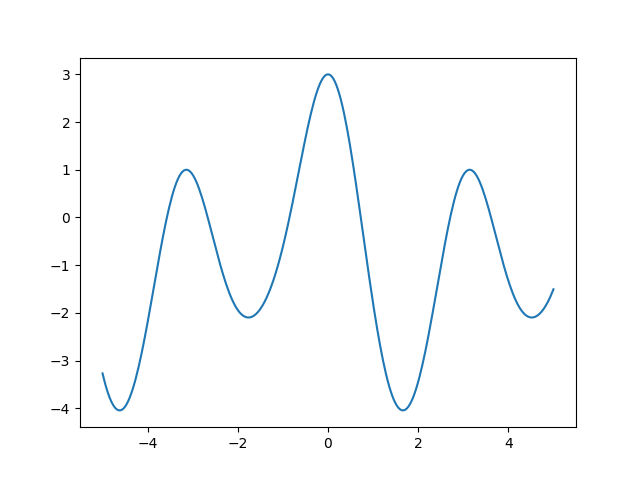

Minimum value of function = -4.043607358196871 at x = 1.6435298779995664


In [4]:
# Defining axes
xbase = np.linspace(-5, 5, 300)
ybase = f5(xbase)

bestx = .2
fig, ax = plt.subplots()
ax.plot(xbase, ybase)

xall, yall = [], []
lr = 0.01

while True:
    # Performing gradient descent
    x = bestx - f5_dx(bestx) * lr 
    ls = np.array([x])
    bestls = np.array([bestx])
    dist = np.linalg.norm(bestls - ls)

    # break if less than tolerance
    if dist < 0.2*lr:
        break

    # Update x
    bestx = x
    y = f5(x)
    xall.append(bestx)
    yall.append(y)

# Plotting 
def onestepderiv(frame):
    ax.scatter(xall[:frame], yall[:frame])

# Animation
ani= FuncAnimation(fig, onestepderiv, frames=range(100), interval=100, repeat=False)
plt.show()

print(f"Minimum value of function = {f5(bestx)} at x = {bestx}")


## Gradient descent in n-dimensions:

`find_min()` performs gradient descent for n dimenstions upto a tolerance to find the minima.

In [6]:
def find_min(func, df, start, tolerance=1e-8, lr=0.1, max_iter=10000):
    """
    Finds minimum using gradient descent

    Parameters
    ----------
    func :- class: <float>
        The function of which minimum is to be found
    df :- <class 'numpy.ndarray'>
        A numpy array containing the partial derivative of f with respect to each variable
    start :- <class 'numpy.ndarray'>
        A numpy array of the starting coordinates 
    tolerance :- class: <float>, optional
        Tolerance of convergence for gradient descent (Default value: 1e-8)
    lr :- class: <float>, optional
        Learning rate (alpha) for gradient descent (Default value: 0.1)
    max_iter:- class: <float>, optional
        Limiting number of iterations performed (Default value: 10000)

    ----------

    Returns
    -------
    x :- <class 'numpy.ndarray'>
        numpy array of coordinates corresponding to minima 
    func_min :- class: <float>
        Value of function minima
    -------
    """

    # Starting coordinates
    x = start
    for i in range(max_iter):
        # Gradient descent
        bestx = x - lr*df(x)
        # Break if less than tolerance
        if np.linalg.norm(bestx - x) < tolerance:
            break
        x = bestx
    func_min = func(x)
    return x, func_min

Testing our function for the following function starting at $(1.4,1.6, 3.2)$:

$$f(x, y, z) = x^3 + y^3 + z^3$$
$$\frac {\partial f}{\partial x} = 3 x^2$$
$$\frac {\partial f}{\partial x} = 3 y^2$$
$$\frac {\partial f}{\partial x} = 3 z^2$$

Expected minima at (0, 0, 0) and minimum value is 0

In [14]:
def fn(x):
    return x[0]**3 + x[1]**3  + x[2]**3 
def fn_d(x):
    return np.array([3*x[0]*x[0], 3*x[1]*x[1], 3*x[2]*x[2]])

coords, min = find_min(fn, fn_d, [1.4,1.6, 3.2], tolerance=1e-10)

print(f"Minimum value = {min}, at {list(coords)}")

Minimum value = 1.1052430407232101e-10, at [0.00033296528813354573, 0.0003329676058080575, 0.0003323026942300731]
